In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
tfpd = tfp.distributions

2024-03-18 13:01:42.877551: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 13:01:42.903052: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 13:01:42.903076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 13:01:42.903729: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 13:01:42.907669: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 13:01:42.908117: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [10]:
# unpickle /net/pc200239/nobackup/users/hakvoort/models/emos_crps.pkl

data = {}
with open('/net/pc200239/nobackup/users/hakvoort/models/emos_twcrps.pkl', 'rb') as f:
    data = pkl.load(f)

print(data)

# save data as emos_twcrps_mean_12_std_4.pkl
with open('/net/pc200239/nobackup/users/hakvoort/models/emos_twcrps_mean_12_std_4.pkl', 'wb') as f:
    pkl.dump(data, f)

{'twcrps_tn': {'loss': 'loss_twCRPS_sample', 'samples': 300, 'optimizer': 'Adam', 'learning_rate': 0.01, 'forecast_distribution': 'distr_trunc_normal', 'feature_mean': array([0.0000000e+00, 1.0172716e+05, 1.4279445e-01, 8.9635211e-01,
       2.9374678e+04], dtype=float32), 'feature_std': array([1.0000000e+00, 1.1295465e+03, 3.5499525e-01, 8.0064192e-02,
       1.0786042e+03], dtype=float32), 'steps_made': 1200, 'features': ['wind_speed', 'press', 'kinetic', 'humid', 'geopot'], 'neighbourhood_size': 11, 'parameters': {'a_tn': array([0.5877269], dtype=float32), 'b_tn': array([ 0.92639434, -0.41853842, -0.11867731, -0.00225808,  0.47088426],
      dtype=float32), 'c_tn': array([2.456814], dtype=float32), 'd_tn': array([0.9217215], dtype=float32)}, 'chain_function': 'chain_function_normal_cdf', 'chain_function_mean': 12.0, 'chain_function_std': 4.0}, 'twcrps_ln': {'loss': 'loss_twCRPS_sample', 'samples': 300, 'optimizer': 'Adam', 'learning_rate': 0.01, 'forecast_distribution': 'distr_log_n

In [3]:
loc = 2.245
scale = 1.014
conc = -0.233

gev_distr = tfpd.GeneralizedExtremeValue(loc=loc, scale=scale, concentration=conc)
support = (loc - scale)/ conc
print(support)

-5.283261802575107


In [4]:
sample_size = 100
samples = gev_distr.sample(sample_size)
print(samples.numpy())

[ 1.1834457   3.0590582   3.8733535   3.5674124   1.8975129   4.413374
  0.36062026  2.4162688   5.255536    2.180546    1.7969067   2.259331
  1.578104    1.244118    4.290183    4.633767    1.8695222   4.693796
  2.6270795   2.1584966   2.526045    3.2163813   3.3876867   3.4089792
  3.8944519   3.2953234   4.33553     1.4458134   4.68225     3.238048
  1.9974036   3.553665    3.3264062   3.453967    2.8441997   5.189266
  1.8187989   2.2813554   4.520461    4.921646    3.9241705   2.8107712
  3.7432504   2.1510978  -0.7533653   2.786241    1.5135055   3.0762455
  1.0388706   5.402646    1.1764743   2.4506283   2.131011    2.850252
  2.1826887   2.9334514   3.0041203   3.0059764   1.0031651   3.7061737
  1.61833     4.750329    5.620063    2.055421    2.385642    2.6892302
  1.4735456   2.8273335   3.680192    2.995327    2.329139    1.5171602
  3.9554276   3.1049602   2.8212652   3.3166523   3.3349514   2.0954397
  2.2246788   1.5328375   1.9670916   2.1681168   3.5113459   1.920628

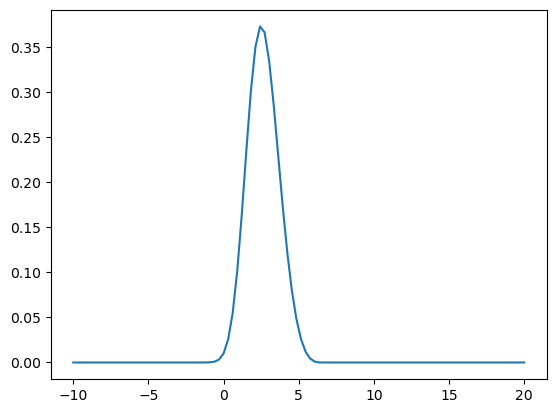

In [5]:
range = np.linspace(-10, 20, 100)
pdf = gev_distr.prob(range)
plt.plot(range, pdf)

In [6]:
print(gev_distr.prob(-1/conc))

tf.Tensor(0.11403375, shape=(), dtype=float32)


tf.Tensor(0.003986163, shape=(), dtype=float32)


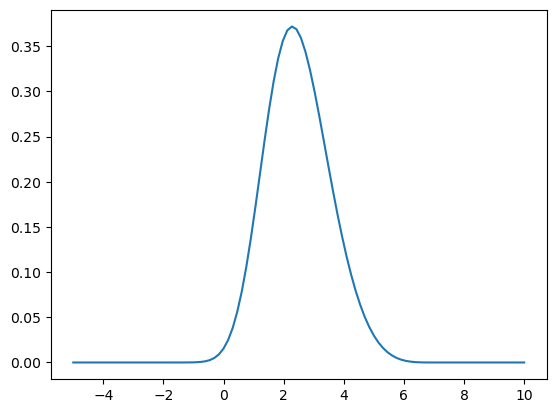

In [7]:
loc = 2.0617504
scale = 1.0107124
conc = -0.20115341 
t = 7.345911949685535
gev_distr = tfpd.GeneralizedExtremeValue(loc=loc, scale=scale, concentration=conc)
print(gev_distr.cdf(0))
values = np.linspace(-5, 10, 100)
plt.plot(values, gev_distr.prob(values))

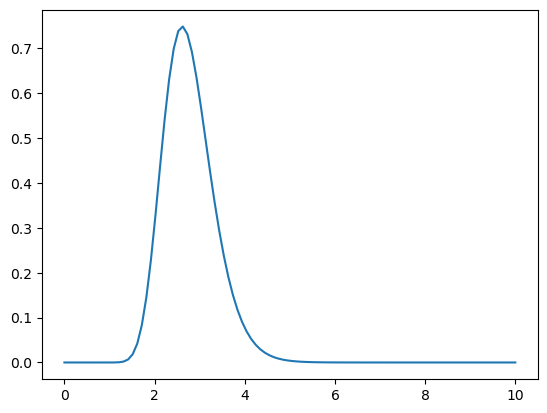

In [14]:
# plot a lognormal cdf

lognorm_distr = tfpd.LogNormal(loc=1, scale=0.2)
values = np.linspace(0, 10, 100)
plt.plot(values, lognorm_distr.prob(values))

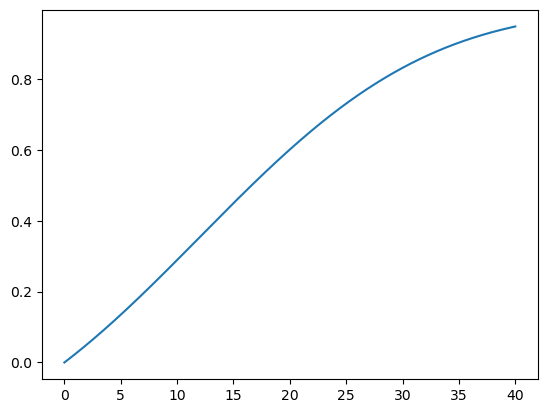

In [5]:
# plot truncnormal cdf with mean 12 std 16:
trunc_normal_distr = tfpd.TruncatedNormal(loc=12, scale=16, low=0, high=200)
values = np.linspace(0, 40, 2000)
plt.plot(values, trunc_normal_distr.cdf(values))